# feature importance in each Funnel Step (using R)

In [1]:
#0: Import Libraries
library(rpart)
library(rpart.plot)
library(randomForest)
library(htmlTable)
library(Gmisc)
library(rattle)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.
Loading required package: Rcpp
Rattle: A free graphical interface for data mining with R.
Version 4.1.0 Copyright (c) 2006-2015 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


## Funnel step: Exposure

In [2]:
infilename = "Data/derived_data/funnel_steps_20161006.csv"

In [3]:
## load dataframe from csv
fii <- read.csv(infilename)


fii$funnel.exposure = fii$funnel.exposure == 'True'
fii$funnel.enrollment = fii$funnel.enrollment == 'True'
fii$funnel.usage = fii$funnel.usage == 'True'
fii$funnel.usage_basic = fii$funnel.usage_basic == 'True'
fii$funnel.usage_sophisticated = fii$funnel.usage_sophisticated == 'True'
fii$funnel.recent = fii$funnel.recent == 'True'
fii$funnel.longevity = fii$funnel.longevity == 'True'
fii$funnel.frequent = fii$funnel.frequent == 'True'
fii$funnel.retention = fii$funnel.retention == 'True'

summary(fii)

       X            country          age            gender      marital_status 
 Min.   :   0   kenya   :2994   Min.   :15.00   Min.   :1.000   Min.   :1.000  
 1st Qu.: 937   nigeria :6001   1st Qu.:24.00   1st Qu.:1.000   1st Qu.:1.000  
 Median :1874   tanzania:3001   Median :30.00   Median :2.000   Median :3.000  
 Mean   :2099   uganda  :3000   Mean   :33.82   Mean   :1.526   Mean   :2.605  
 3rd Qu.:2811                   3rd Qu.:40.00   3rd Qu.:2.000   3rd Qu.:3.000  
 Max.   :6000                   Max.   :96.00   Max.   :2.000   Max.   :9.000  
                                NA's   :75                                     
 education_level  funnel.exposure funnel.enrollment funnel.usage_basic
 Min.   : 1.000   Mode :logical   Mode :logical     Mode :logical     
 1st Qu.: 3.000   FALSE:6416      FALSE:9063        FALSE:9293        
 Median : 4.000   TRUE :8580      TRUE :5933        TRUE :5703        
 Mean   : 4.402   NA's :0         NA's :0           NA's :0           
 3rd 

In [4]:
names(fii)

[1] "X"                          "country"                   
 [3] "age"                        "gender"                    
 [5] "marital_status"             "education_level"           
 [7] "funnel.exposure"            "funnel.enrollment"         
 [9] "funnel.usage_basic"         "funnel.usage_sophisticated"
[11] "funnel.usage"               "funnel.recent"             
[13] "funnel.longevity"           "funnel.frequent"           
[15] "funnel.retention"

## Mask

In [5]:
selected_country = 'kenya'
#col = 'funnel.usage_sophisticated'
col = 'funnel.retention'

x_cols = c('age', 'gender', 'marital_status', 'education_level')
keep_cols = c(x_cols, paste(col))
#keep_cols = c('age', 'gender', 'marital_status', 'education_level', paste(col))

# population mask
mask = fii$country==selected_country
mask = mask & fii$funnel.usage_sophisticated # funnel_retention

dat <- fii[mask, keep_cols]



## RPart

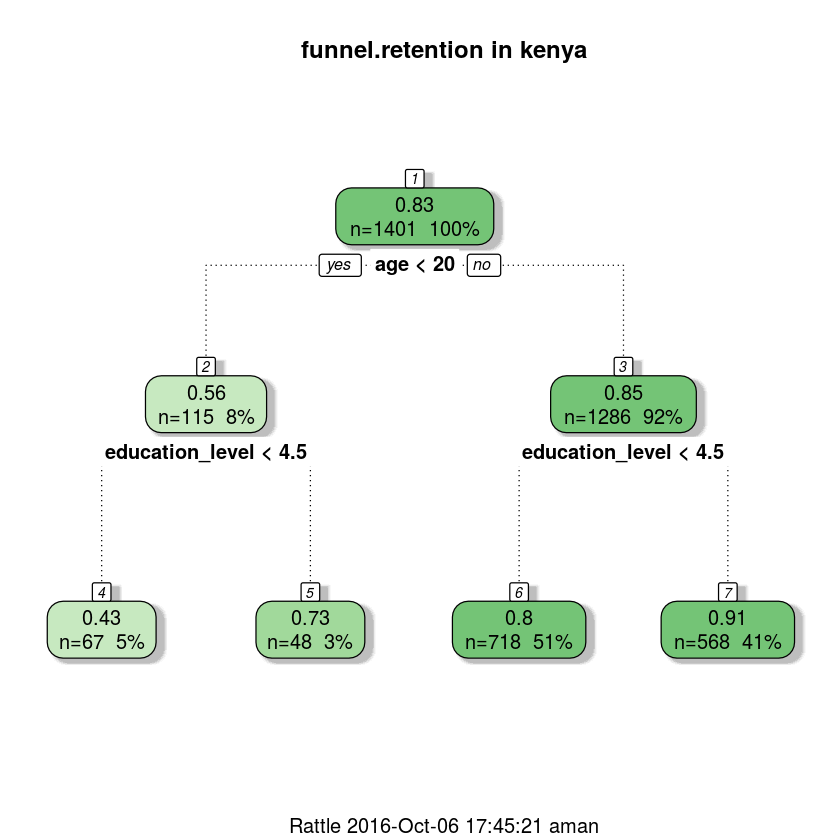

In [6]:
form <- paste(paste(col),"~.")
tree <- rpart(formula = form, 
              data=dat,
#              # cp=0.01
              )

# #options(repr.plot.width=8, repr.plot.height=8)
# #prp(tree, main="hi")
# #rx

#fancyRpartPlot(tree)
p <- fancyRpartPlot(tree, main=paste(paste(col), "in", paste(selected_country)))


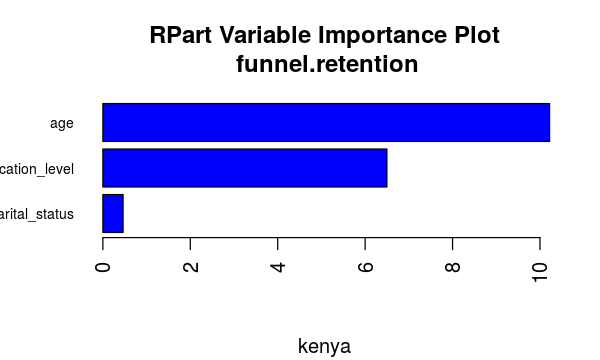

In [16]:
options(repr.plot.width=5, repr.plot.height=3)
barplot(
    sort(tree$variable.importance), 
    col=4, las=2, cex.names = .7, horiz=T, 
    main = paste("RPart Variable Importance Plot\n", col),
    sub=selected_country)



In [17]:
summary(tree)

Call:
rpart(formula = form, data = dat)
  n= 1401 

          CP nsplit rel error    xerror       xstd
1 0.04548254      0 1.0000000 1.0028506 0.04621288
2 0.02012417      1 0.9545175 0.9677922 0.04567502
3 0.01222630      2 0.9343933 0.9729830 0.04544404
4 0.01000000      3 0.9221670 0.9679282 0.04534456

Variable importance
            age education_level  marital_status 
             59              38               3 

Node number 1: 1401 observations,    complexity param=0.04548254
  mean=0.8265525, MSE=0.1433635 
  left son=2 (115 obs) right son=3 (1286 obs)
  Primary splits:
      age             < 20.5 to the left,  improve=0.045482540, (0 missing)
      education_level < 4.5  to the left,  improve=0.029007720, (0 missing)
      gender          < 1.5  to the right, improve=0.009374940, (0 missing)
      marital_status  < 1.5  to the left,  improve=0.003541595, (0 missing)

Node number 2: 115 observations,    complexity param=0.0122263
  mean=0.5565217, MSE=0.2468053 
  left son

## Random Forest


In [18]:
na_mask = mask & (complete.cases(fii[,keep_cols]))

dat <- fii[na_mask, keep_cols]

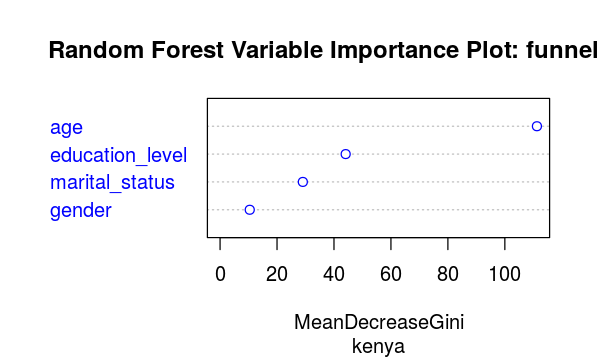

In [19]:

forest <- randomForest(
    x=dat[,x_cols],
    y=as.factor(dat[,col]),
    type=classification,
    #as.factor(col)~.,
    data=dat,
    cp=0.001)

varImpPlot(
    forest, 
    main = paste("Random Forest Variable Importance Plot:", col),
    col=4, 
    sub=selected_country)


In [20]:
summary(forest)

                Length Class  Mode     
call               6   -none- call     
type               1   -none- character
predicted       1401   factor numeric  
err.rate        1500   -none- numeric  
confusion          6   -none- numeric  
votes           2802   matrix numeric  
oob.times       1401   -none- numeric  
classes            2   -none- character
importance         4   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y               1401   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     

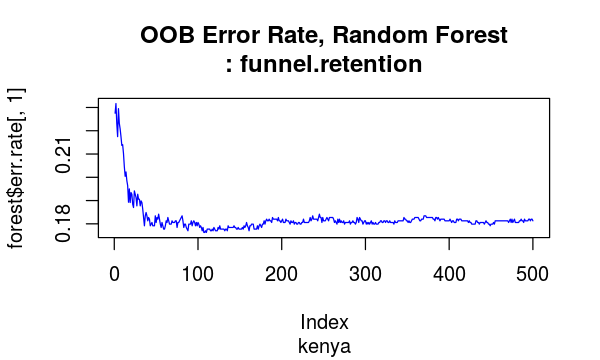

In [21]:
plot(forest$err.rate[,1], type='l',col=4, 
     main = paste("OOB Error Rate, Random Forest\n:", col),
     sub=paste(selected_country),
     )

In [22]:
1-min(forest$err.rate[,1])

[1] 0.8236974